In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [143]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/TECHM.csv")

In [144]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2006-08-28,TECHM,EQ,365.00,521.0,569.0,502.00,553.00,554.25,552.00,15166163,8.371760e+14,NaN,3777529,0.2491
1,2006-08-29,TECHM,EQ,554.25,555.0,563.9,535.55,536.10,539.30,547.59,3929113,2.151530e+14,NaN,727534,0.1852
2,2006-08-30,TECHM,EQ,539.30,537.0,542.9,521.50,529.00,528.10,529.55,2034983,1.077630e+14,NaN,345064,0.1696
3,2006-08-31,TECHM,EQ,528.10,525.0,544.0,515.00,539.35,538.45,532.89,1670990,8.904464e+13,NaN,286440,0.1714
4,2006-09-01,TECHM,EQ,538.45,539.0,549.0,535.10,541.35,541.85,542.46,1176195,6.380386e+13,NaN,213842,0.1818


In [145]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3635 non-null   object 
 1   Symbol              3635 non-null   object 
 2   Series              3635 non-null   object 
 3   Prev Close          3635 non-null   float64
 4   Open                3635 non-null   float64
 5   High                3635 non-null   float64
 6   Low                 3635 non-null   float64
 7   Last                3635 non-null   float64
 8   Close               3635 non-null   float64
 9   VWAP                3635 non-null   float64
 10  Volume              3635 non-null   int64  
 11  Turnover            3635 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3635 non-null   int64  
 14  %Deliverble         3635 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 426.1

In [146]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3.635000e+03,3.635000e+03,2456.000000,3.635000e+03,3635.000000
mean,883.174292,884.399697,899.182173,869.315447,883.221871,883.338088,884.722347,1.594018e+06,1.214401e+14,51869.765472,7.434464e+05,0.438308
std,511.305822,511.325737,517.678224,505.245101,511.292296,511.235143,511.551922,2.039099e+06,1.493583e+14,38982.291775,1.011084e+06,0.173677
min,209.300000,215.250000,225.050000,205.000000,206.600000,209.300000,216.030000,1.921000e+03,9.384622e+10,187.000000,6.890000e+02,0.075300
25%,567.625000,570.000000,578.550000,556.200000,567.925000,568.275000,567.245000,2.393455e+05,2.048278e+13,23462.250000,7.643800e+04,0.299900
50%,723.550000,725.000000,736.700000,712.600000,723.950000,723.600000,724.180000,8.606800e+05,7.753787e+13,45008.000000,3.591660e+05,0.448100
75%,976.025000,976.000000,993.400000,961.800000,975.950000,976.025000,977.165000,2.253448e+06,1.637602e+14,70815.000000,1.127234e+06,0.572050
max,2921.650000,2972.000000,2995.100000,2891.750000,2920.000000,2921.650000,2935.980000,3.117145e+07,1.758825e+15,398757.000000,2.129531e+07,0.999200


In [147]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [148]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [149]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [150]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [151]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [152]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [153]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
3630,3.521878,1.177708,962.20,5053998,NaN
3631,4.602023,0.680378,969.25,10497935,NaN
3632,1.239669,0.246154,977.40,2968625,NaN
3633,1.488847,-0.822335,976.90,2747579,NaN
3634,2.250366,-1.376053,960.40,3129105,NaN


In [154]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_9868\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [155]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [156]:
#Define the prediction model
model = RandomForestRegressor()

In [157]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [158]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9158420196865568


In [159]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [160]:
predictions = model.predict(X_Check)

In [161]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

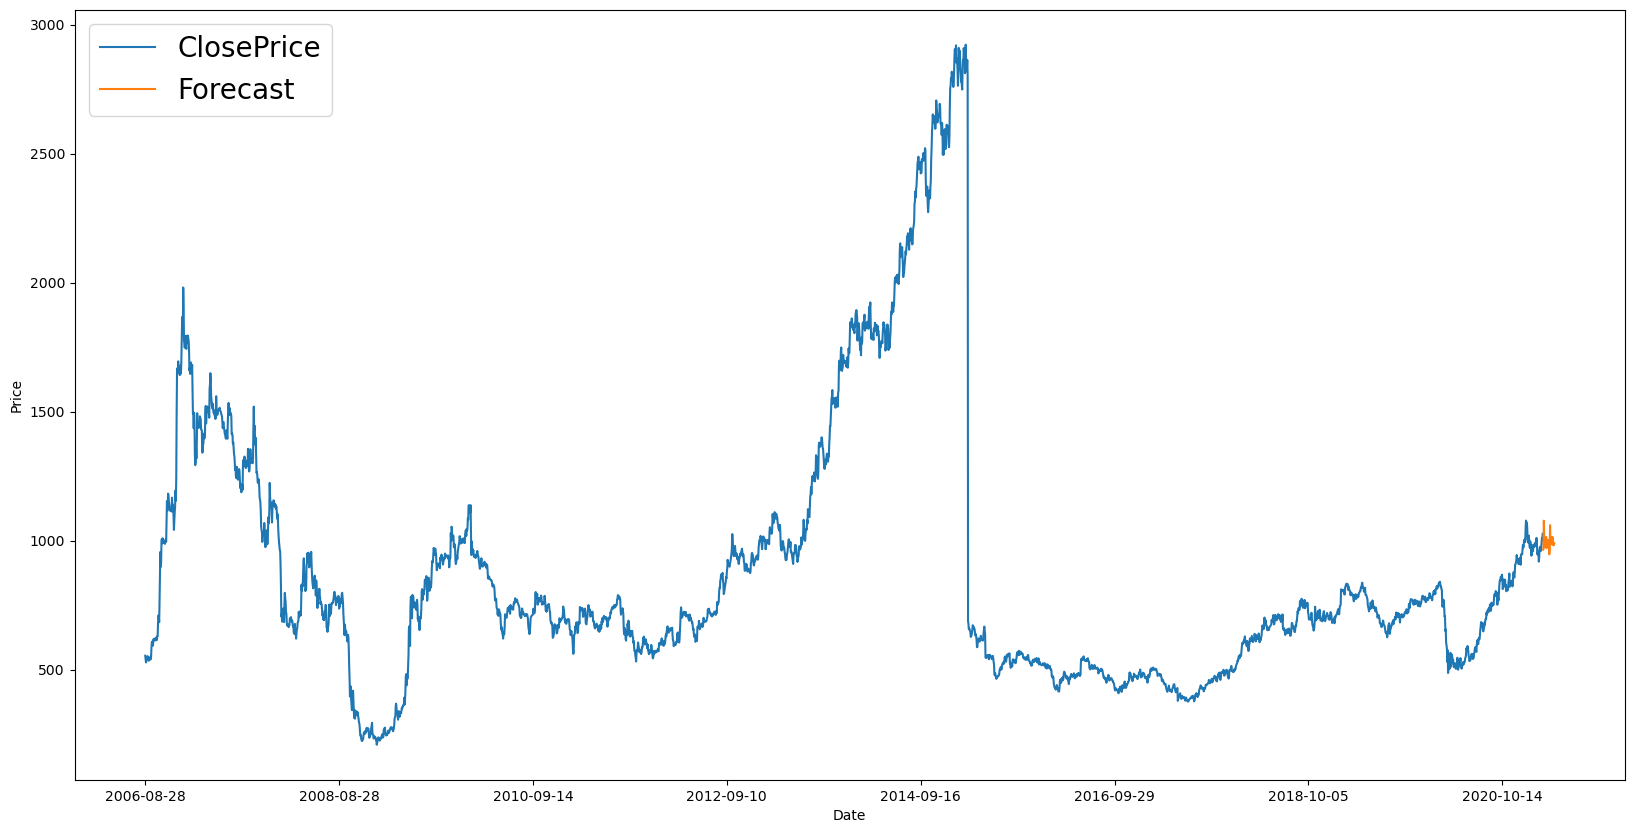

In [162]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')